In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df = pd.read_csv("/content/drive/My Drive/Fall_22/CSE422/Final_Project/infy_stock.csv",
                 usecols=['Date', 'Close'], parse_dates=['Date'],index_col='Date')
df.head()

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


In [48]:
df.shape

(248, 1)

In [49]:
df.isnull().sum()

Close    0
dtype: int64

In [50]:
'''df = df.drop(, axis = 1)
df.shape'''

'df = df.drop(, axis = 1)\ndf.shape'

In [51]:
ndf = pd.read_csv("/content/drive/My Drive/Fall_22/CSE422/Final_Project/infy_stock.csv", index_col = ['Date'])
ndf

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
2015-12-28,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
2015-12-29,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785


In [54]:
ndf[["Open"]]

,Open
Date,
2015-01-01,1968.95
2015-01-02,1972.00
2015-01-05,2009.90
2015-01-06,1980.00
2015-01-07,1965.00
...,...
2015-12-24,1102.05
2015-12-28,1090.00
2015-12-29,1101.25


In [52]:
df.loc['2015-01-07',:]

Close    1963.55
Name: 2015-01-07 00:00:00, dtype: float64

In [ ]:
df.info()
print("Min:",df.index.min())
print("Max:",df.index.max())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   248 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB
Min: 2015-01-01 00:00:00
Max: 2015-12-31 00:00:00


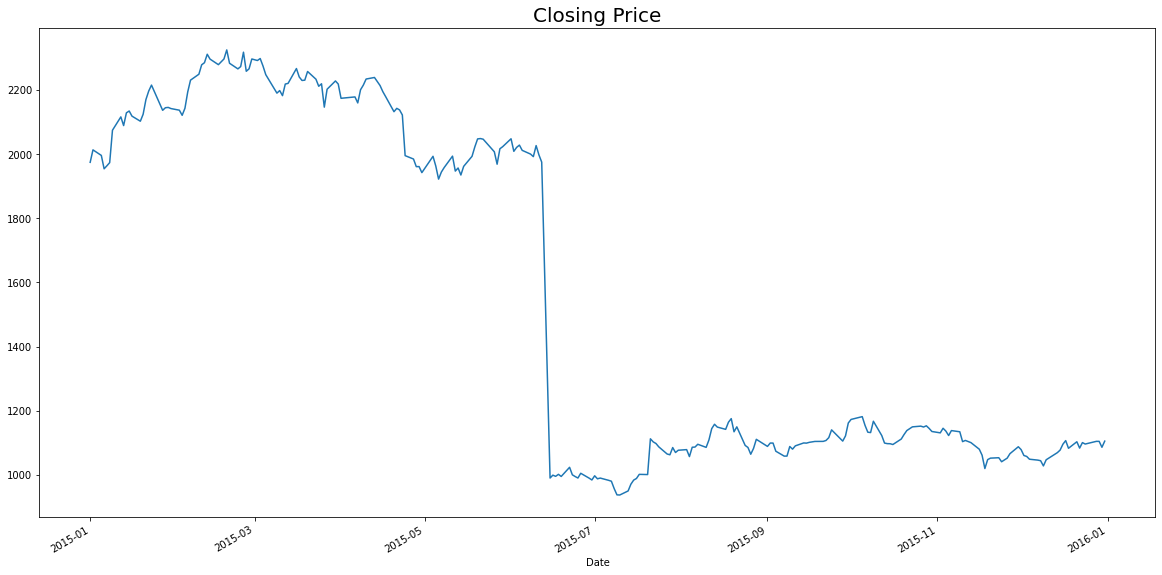

In [ ]:
#Closing Price Visualization
plt.figure(figsize=(20,10))
df.Close.plot()
plt.title("Closing Price", fontsize=20)
plt.show()

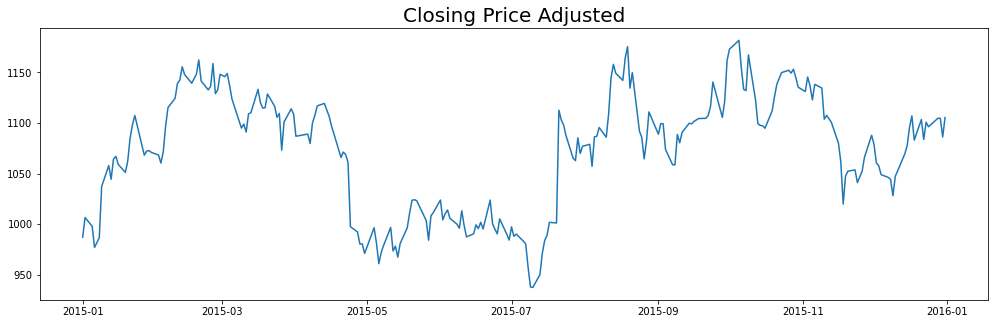

In [ ]:
plt.figure(figsize=(17,5))
stock_price = pd.concat([df.Close[:'2015-06-12']/2,df.Close['2015-06-15':]]) # adjustment
plt.plot(stock_price)
plt.title("Closing Price Adjusted",fontsize=20)
plt.show()


In [ ]:
#helper function to plot the stock prediction
prev_values = stock_price.iloc[:180] #train
y_test = stock_price.iloc[180:] #test

def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()



In [ ]:
#Average of previous values
from sklearn.metrics import mean_squared_error as mse
y_av = pd.Series(np.repeat(prev_values.mean(),68),index=y_test.index)
mse(y_av,y_test)

3173.6356476000856

In [ ]:
np.sqrt(mse(y_av,y_test))

56.33503037720035

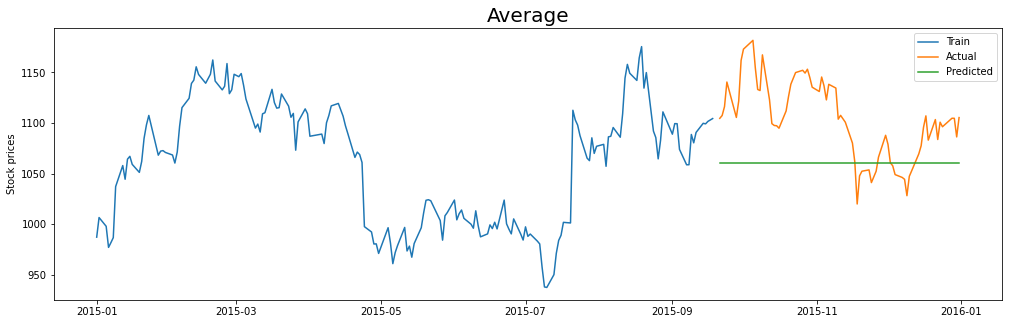

In [ ]:
plot_pred(y_av,"Average")

In [ ]:
weight = np.array(range(0,180))/180
weighted_train_data =np.multiply(prev_values,weight)

# weighted average is the sum of this weighted train data by the sum of the weight

weighted_average = sum(weighted_train_data)/sum(weight)
y_wa = pd.Series(np.repeat(weighted_average,68),index=y_test.index)

print("MSE: " ,mse(y_wa,y_test))
print("RMSE: " ,np.sqrt(mse(y_wa,y_test)))

MSE:  3496.475652551586
RMSE:  59.1310041564625


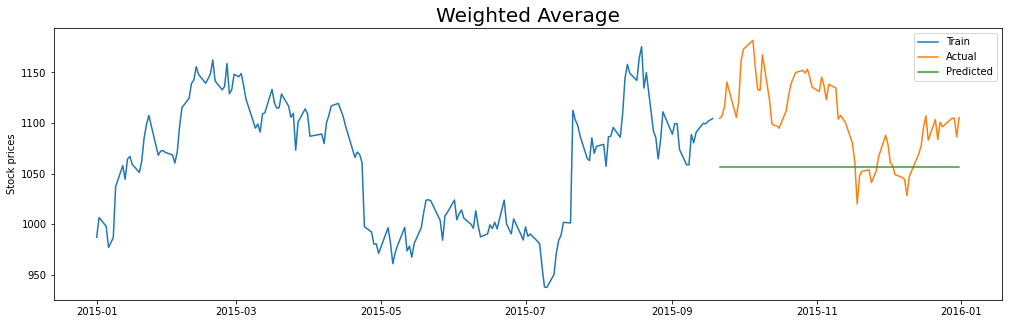

In [ ]:
plot_pred(y_wa, "Weighted Average")

In [ ]:
w = np.array(range(0,1809))/1809
print(w)

[0.00000000e+00 5.52791598e-04 1.10558320e-03 ... 9.98341625e-01
 9.98894417e-01 9.99447208e-01]


In [ ]:
y_train = stock_price[80:180]
y_test = stock_price[180:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)



y train: (100,) 
y test: (68,)


In [55]:
X_train = pd.DataFrame([list(stock_price[i:i+80]) for i in range(100)],
                       columns=range(80,0,-1),index=y_train.index)
X_test = pd.DataFrame([list(stock_price[i:i+80]) for i in range(100,168)],
                       columns=range(80,0,-1),index=y_test.index)


X_train



,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,987.200,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,...,1097.325,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575
2015-05-04,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,...,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125
2015-05-05,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,...,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550
2015-05-06,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,...,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375
2015-05-07,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,...,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-11,1023.225,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,...,1111.050,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450
2015-09-14,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,...,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750
2015-09-15,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,1000.025,...,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750,1099.750


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
y_ma = X_test.mean(axis=1)
mse(y_ma,y_test), np.sqrt(mse(y_ma,y_test))

(2901.424183296478, 53.86486965821488)

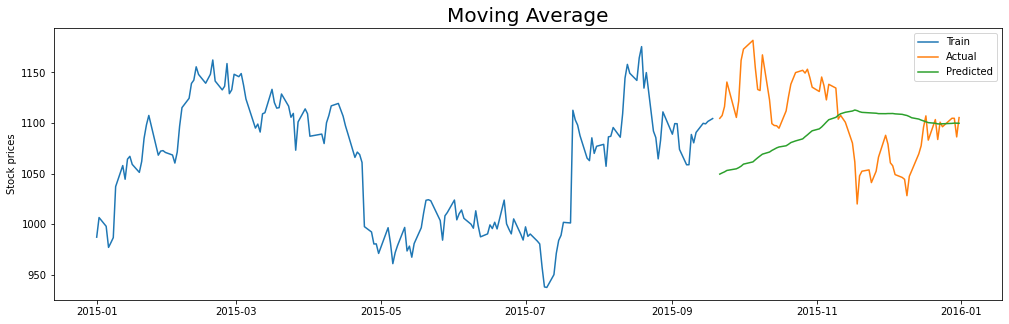

In [ ]:


plot_pred(y_ma,"Moving Average")



In [ ]:


weight = np.array(range(1,81))/80
#weighted moving average
y_wma = X_test@weight/sum(weight)
mse(y_wma,y_test),np.sqrt(mse(y_wma,y_test))



(1769.4332039308204, 42.064631270591455)

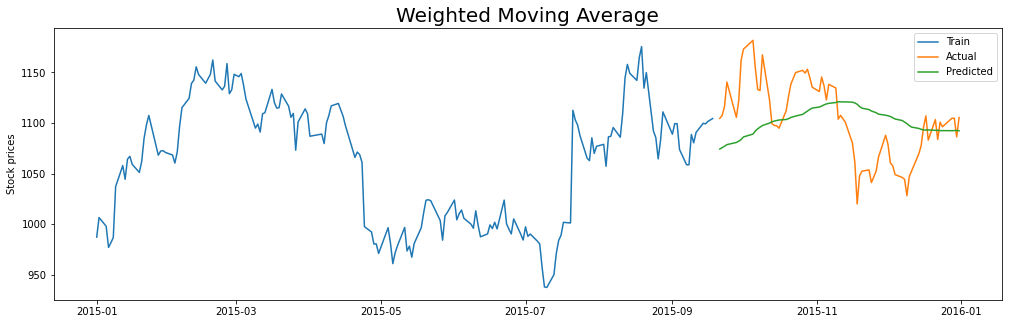

In [ ]:


plot_pred(y_wma,"Weighted Moving Average")



In [ ]:


from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train) # Training the models
y_lr = lr.predict(X_test) # inference
y_lr = pd.Series(y_lr,index=y_test.index)

mse(y_test,y_lr), np.sqrt(mse(y_test,y_lr))



(1754.1645412925623, 41.88274753753104)

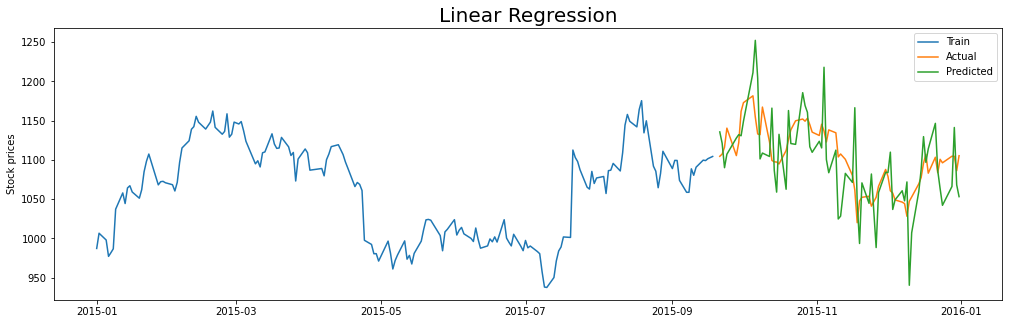

In [ ]:


plot_pred(y_lr,"Linear Regression")



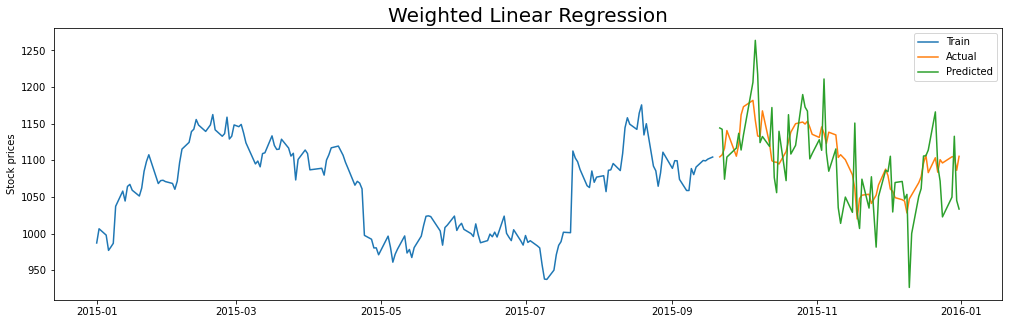

In [ ]:


weight = np.array(range(1,101))/100
wlr = LinearRegression()

wlr.fit(X_train,y_train,weight)
y_wlr = wlr.predict(X_test)
y_wlr = pd.Series(y_wlr,index=y_test.index)

mse(y_test,y_wlr), np.sqrt(mse(y_test,y_wlr))

plot_pred(y_wlr,"Weighted Linear Regression")


In [ ]:


from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(X_train,y_train)
y_las = las.predict(X_test)
y_las = pd.Series(y_las,index = y_test.index)

mse(y_las,y_test), np.sqrt(mse(y_test,y_wlr))



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.020e+02, tolerance: 3.391e+01
  model = cd_fast.enet_coordinate_descent(


(1467.333864613377, 45.325063793432726)

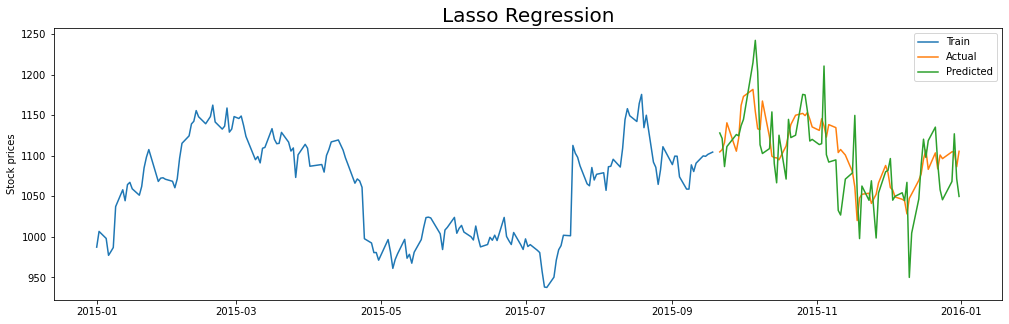

In [ ]:


plot_pred(y_las,"Lasso Regression")



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#moving average Neural Network
ma_nn = Sequential([Dense(64,input_shape=(80,),activation='relu'), 
                    Dense(32,activation='linear'),Dense(1)])

ma_nn.compile(loss='mse',optimizer='rmsprop',metrics=['mae','mse'])

history = ma_nn.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.25)

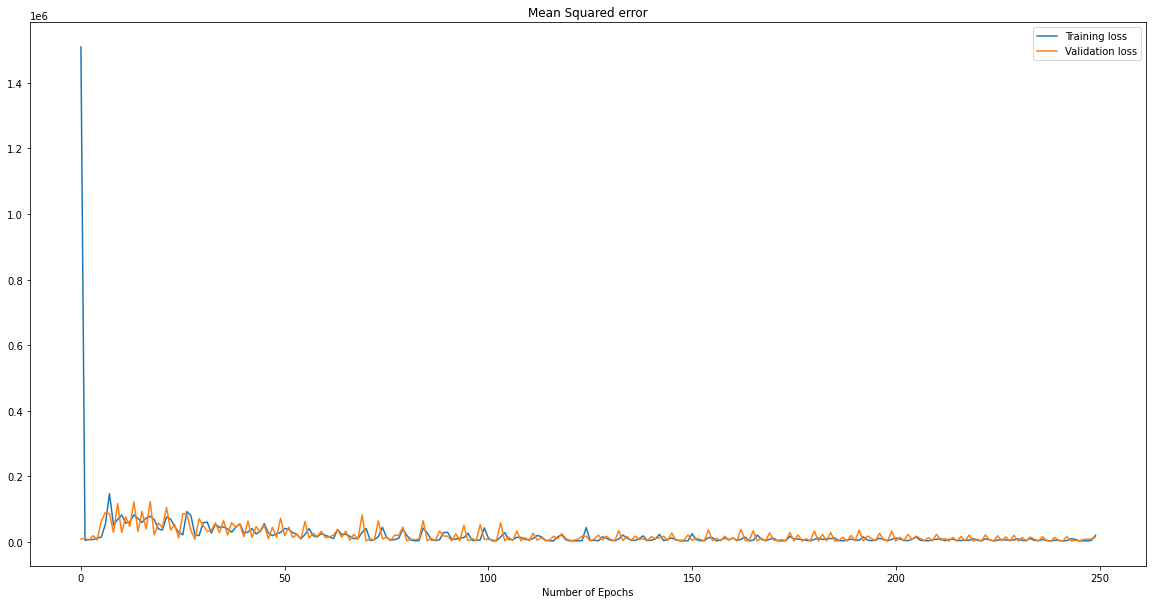

In [ ]:


plt.plot(history.history['mse'],label='Training loss')
plt.plot(history.history['val_mse'], label='Validation loss')
plt.title("Mean Squared error")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()



In [ ]:


loss_nn,mae_nn,mse_nn = ma_nn.evaluate(X_test,y_test)
print("\nloss:",loss_nn,"\nmae:",mae_nn,"\nmse:",mse_nn)



3/3 [==============================] - 0s 7ms/step - loss: 8073.3604 - mae: 80.6207 - mse: 8073.3604

loss: 8073.3603515625 
mae: 80.62071228027344 
mse: 8073.3603515625


In [ ]:


y_nn = ma_nn.predict(X_test)
y_nn = pd.Series(y_nn[:,0],index=y_test.index)
mse(y_nn,y_test),np.sqrt(mse(y_nn,y_test))



3/3 [==============================] - 0s 4ms/step


(8073.358589834415, 89.85187026341976)

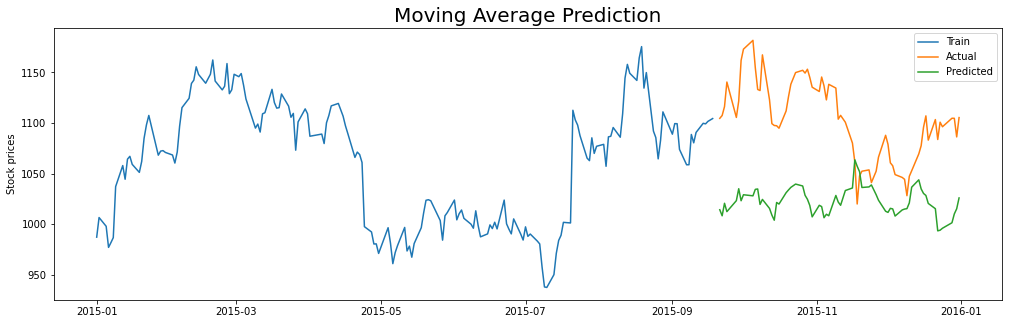

In [ ]:


plot_pred(y_nn,"Moving Average Prediction")



,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


AttributeError: ignored